In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import os
%matplotlib inline

In [35]:
jor['Journey Duration'].max()

1984700.0

In [34]:
jor = pd.read_csv('journeys.csv', delimiter=',')
jor.dataframeName = 'journeys.csv'
jor.shape

(1542844, 14)

# DATA MANIPULATION AND PREPROCESSING

In [ ]:
jor.head()   #London bike sharing system 

In [36]:
#jor.isnull().sum()
print(jor.duplicated().sum())
jor[jor.duplicated()]

8


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
30013,0.0,13484,14,9,17,13,37,111,14,9,17,13,37,111
94887,0.0,14793,13,9,17,23,4,491,13,9,17,23,4,491
182801,0.0,1093,18,9,17,19,40,388,18,9,17,19,40,388
222189,0.0,2760,6,9,17,23,59,600,6,9,17,23,59,600
246068,0.0,4156,11,9,17,10,40,375,11,9,17,10,40,375
299501,0.0,6143,9,9,17,16,34,715,9,9,17,16,34,715
377852,0.0,13095,7,9,17,18,5,270,7,9,17,18,5,270
461459,0.0,2888,1,9,17,22,53,462,1,9,17,22,53,462


In [37]:
jor[jor['Journey Duration'] <= 0].shape[0]

1609

There are 1609 journeys with 0 seconds duration, we drop them.

In [38]:
jor = jor.drop(jor[jor['Journey Duration'] <= 0].index).reset_index(drop=True)

In [39]:
jor[['End Station ID','Start Station ID']].nunique()

End Station ID      779
Start Station ID    779
dtype: int64

In [40]:
st = pd.read_csv('stations.csv', delimiter=',')
st.dataframeName = 'stations.csv'
st.shape

(773, 5)

We have 773 stations in stations.csv, however there are 6 more stations involved in journeys, since our problem will be based on stations, so we will drop the journeys that are not starting or ending at a valid station.

In [41]:
st.head()

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


In [42]:
Stations = st['Station ID'].values

def StationValid(SSID, ESID):
    if(SSID in Stations) & (ESID in Stations):
        return True
    else:
        return False


jor['Valid'] = jor.apply(lambda x: StationValid(x['End Station ID'], x['Start Station ID']), axis = 1)

In [43]:
df = jor.drop(jor[jor['Valid'] == False].index).reset_index(drop=True)

In [44]:
df = df.drop(columns='Valid')

df.nunique()

Journey Duration    16394
Journey ID          11144
End Date               31
End Month               2
End Year                1
End Hour               24
End Minute             60
End Station ID        771
Start Date             31
Start Month             2
Start Year              1
Start Hour             24
Start Minute           60
Start Station ID      771
dtype: int64

In [45]:
jor[jor['Valid'] == False] #201, 300, 783

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Valid
16,480.0,1916,15,9,17,15,0,186,15,9,17,14,52,201,False
17,1320.0,9528,14,9,17,13,14,176,14,9,17,12,52,201,False
18,720.0,11403,15,9,17,19,42,201,15,9,17,19,30,224,False
19,600.0,482,14,9,17,15,13,201,14,9,17,15,3,176,False
20,660.0,13331,19,9,17,14,12,201,19,9,17,14,1,105,False
21,540.0,5607,19,9,17,11,9,105,19,9,17,11,0,201,False
127,660.0,12179,17,9,17,11,9,300,17,9,17,10,58,265,False
135,720.0,12179,17,9,17,12,12,99,17,9,17,12,0,300,False
215,1380.0,14932,14,9,17,23,5,191,14,9,17,22,42,300,False
697,2760.0,10236,17,9,17,10,38,300,17,9,17,9,52,307,False


In [46]:
st[st['Station ID'].isin([201, 300, 783])]

,Station ID,Capacity,Latitude,Longitude,Station Name


# DATA VISUALIZATION

In [56]:
df['Start DT'].max()

Timestamp('2017-09-19 23:00:00')

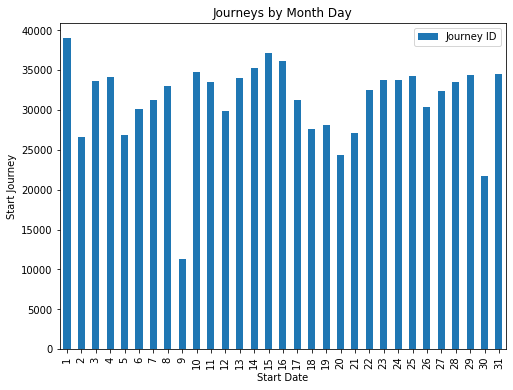

In [49]:
df_monthdays = df[df['Start Month'] == 8]
df_monthdays = df_monthdays.pivot_table(index= 'Start Date',
                                  values='Journey ID',
                                  aggfunc='count')
df_monthdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Start Journey')
plt.title('Journeys by Month Day');

throughout the month of August our counts for journeys remains bw 25k to 40k how ever on 9th August, 2017. It went abnormally downhill, on further investigating:

London weather forecast: Capital hit by more than 12 hours of torrential downpours 

London was battered with more than 12 hours of torrential downpours after forecasters issued a weather alert for the capital.

Heavy rain began to fall in the city on Wednesday morning and sparked flooding and disruption for commuters on the railways and roads throughout the day.

url: https://www.standard.co.uk/news/london/london-weather-capital-battered-with-more-than-12-hours-of-torrential-downpours-a3608151.html

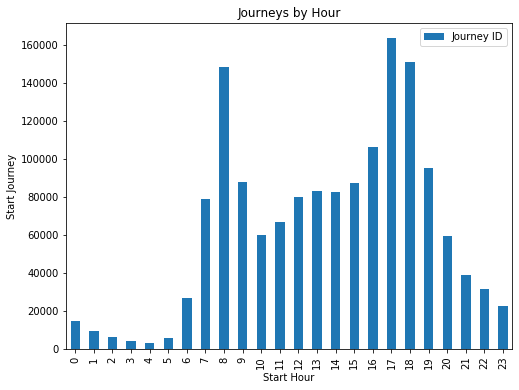

In [50]:
df_hours = df.pivot_table(index=['Start Hour'],
                                  values='Journey ID',
                                  aggfunc='count')
df_hours.plot(kind='bar', figsize=(8,6))
plt.ylabel('Start Journey')
plt.title('Journeys by Hour');

As expected we have two peaks at morning and evening, for bike commute, these hours will be the foucus of our problem when we go further.

In [51]:
from datetime import datetime

df['Start DT'] = df.apply(lambda x: datetime(int(2017), int(x['Start Month']), int(x['Start Date']), int(x['Start Hour'])), axis = 1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517095 entries, 0 to 1517094
Data columns (total 15 columns):
Journey Duration    1517095 non-null float64
Journey ID          1517095 non-null int64
End Date            1517095 non-null int64
End Month           1517095 non-null int64
End Year            1517095 non-null int64
End Hour            1517095 non-null int64
End Minute          1517095 non-null int64
End Station ID      1517095 non-null int64
Start Date          1517095 non-null int64
Start Month         1517095 non-null int64
Start Year          1517095 non-null int64
Start Hour          1517095 non-null int64
Start Minute        1517095 non-null int64
Start Station ID    1517095 non-null int64
Start DT            1517095 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(13)
memory usage: 173.6 MB


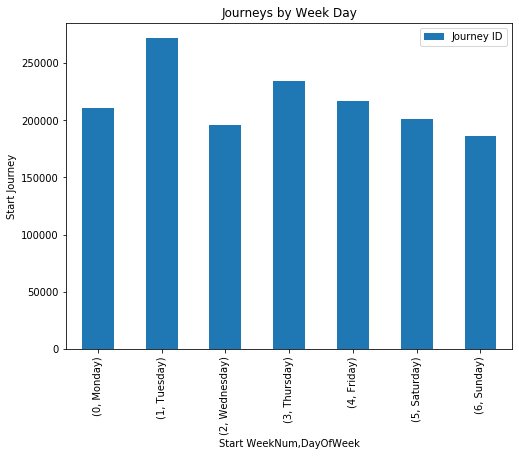

In [53]:
df['Start WeekNum'] = df['Start DT'].dt.dayofweek
df['DayOfWeek'] = df['Start DT'].dt.weekday_name




df_weekdays = df.pivot_table(index=['Start WeekNum','DayOfWeek'],
                                  values='Journey ID',
                                  aggfunc='count')
df_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Start Journey')
plt.title('Journeys by Week Day');

In [54]:
dfweekdays = df[~((df['DayOfWeek'] == 'Saturday') | (df['DayOfWeek'] == 'Sunday'))]
dfweekends = df[(df['DayOfWeek'] == 'Saturday') | (df['DayOfWeek'] == 'Sunday')]

In [55]:
dfweekends.sample(20)

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Start DT,Start WeekNum,DayOfWeek
748593,9.0,12494,27,8,17,13,1,257,27,8,17,13,0,257,2017-08-27 13:00:00,6,Sunday
291854,360.0,7000,9,9,17,21,20,500,9,9,17,21,14,492,2017-09-09 21:00:00,5,Saturday
148185,1800.0,14326,16,9,17,16,8,545,16,9,17,15,38,24,2017-09-16 15:00:00,5,Saturday
765026,432.0,9835,27,8,17,19,10,148,27,8,17,19,3,181,2017-08-27 19:00:00,6,Sunday
1467321,1551.0,5568,6,8,17,14,20,81,6,8,17,13,54,163,2017-08-06 13:00:00,6,Sunday
1202610,1338.0,7352,12,8,17,12,12,235,12,8,17,11,49,278,2017-08-12 11:00:00,5,Saturday
1247704,4191.0,3866,13,8,17,17,45,787,13,8,17,16,36,785,2017-08-13 16:00:00,6,Sunday
495258,1680.0,3327,2,9,17,18,8,564,2,9,17,17,40,732,2017-09-02 17:00:00,5,Saturday
1005068,735.0,6238,20,8,17,11,40,477,20,8,17,11,27,547,2017-08-20 11:00:00,6,Sunday
506442,420.0,14962,3,9,17,12,15,506,3,9,17,12,8,319,2017-09-03 12:00:00,6,Sunday


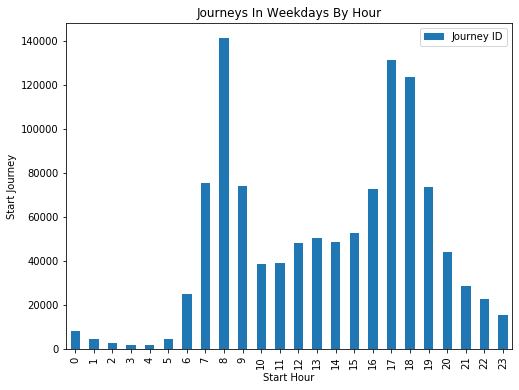

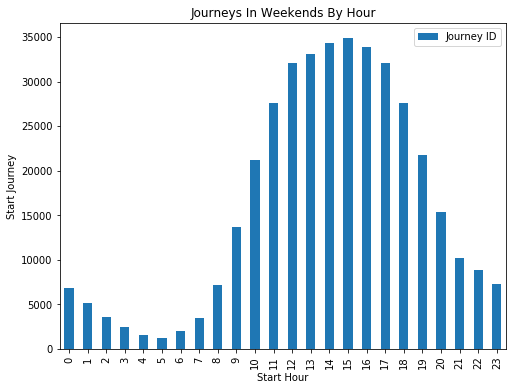

In [57]:
df_weekhours = dfweekdays.pivot_table(index=['Start Hour'],
                                  values='Journey ID',
                                  aggfunc='count')
df_weekhours.plot(kind='bar', figsize=(8,6))
plt.ylabel('Start Journey')
plt.title('Journeys In Weekdays By Hour');

df_wendshours = dfweekends.pivot_table(index=['Start Hour'],
                                  values='Journey ID',
                                  aggfunc='count')
df_wendshours.plot(kind='bar', figsize=(8,6))
plt.ylabel('Start Journey')
plt.title('Journeys In Weekends By Hour');

THE PLOTTING SHOWS SIGNIFICANT DIFFERENCE IN START TIME DEPENDING ON WEEKEND OR WEEKDAY.

The journey patterns are very different on weekdays and weekends so are the count of journeys.

In [58]:
summary = dfweekdays.groupby(['DayOfWeek', 'Start Hour'])['Journey ID'].count()

summary = summary.reset_index()
summary = pd.DataFrame(summary)
summary.head()

,DayOfWeek,Start Hour,Journey ID
0,Friday,0,2125
1,Friday,1,1145
2,Friday,2,753
3,Friday,3,504
4,Friday,4,427


In [59]:
import folium
import seaborn as sns

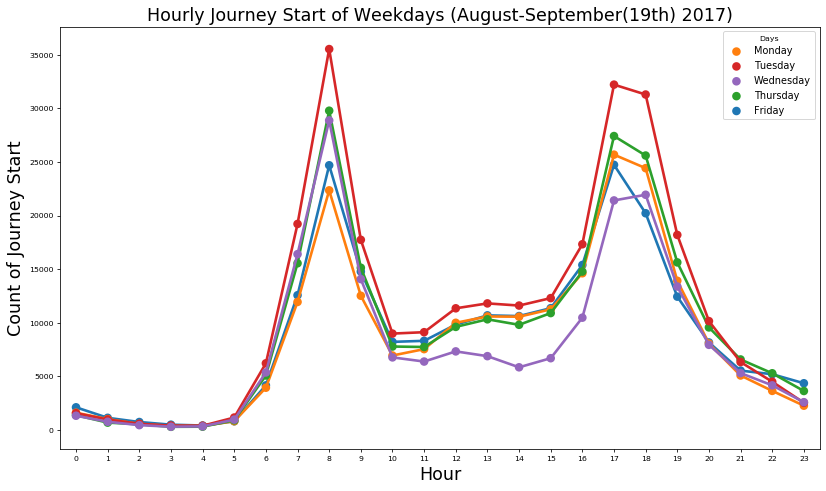

In [60]:
#sns.set_style('whitegrid')
plt.figure(figsize=(14, 8), dpi=70)
ax = sns.pointplot(x="Start Hour", y="Journey ID", hue="DayOfWeek", data=summary)
handles,labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[3], handles[4], handles[2], handles[0]]
labels = [labels[1], labels[3], labels[4], labels[2], labels[0]]
ax.set_xlabel('Hour', fontsize = 18)
ax.set_ylabel('Count of Journey Start', fontsize = 18)
ax.set_title('Hourly Journey Start of Weekdays (August-September(19th) 2017)', fontsize=18)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title="Days", prop={'size':10})
ax.get_legend().get_title().set_fontsize('8')
plt.show()

Our count for weekdays journey against hours have almost same patterns with minimal difference, however TUESDAY has more number of journeys which can be explained since we have the data that starts on tuesday and ends on tuesday,


August 1st, 2017 = Tuesday

September 19th, 2017 = Tuesday

In [61]:
# import gmplot

# latitudes = new_df['Latitude']
# longitudes = new_df['Longitude']

# # Parameters: Lattitude, Longitude, Zoom
# gmap = gmplot.GoogleMapPlotter(51.509865, 51.509865, 10)

# gmap.heatmap(latitudes, longitudes)

# # Generate the heatmap into an HTML file
# gmap.draw("my_heatmap.html")

In [62]:
print(st['Capacity'].min())
print(st['Capacity'].max())

10
64


In [63]:
def colmarker(c):
    if(c < 15):
        return('red')
    elif(15 <= c < 30):
        return('orange')
    else:
        return('green')

In [1]:
#london 51.506949, -0.122876

map3 = folium.Map([51.506949, -0.122876], tiles='CartoDB positron', zoom_start=14)
for index, row in st.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=15,
                        popup=row['Station Name'] + '\n Capacity: ' + str(row['Capacity']),
                        fill_color=colmarker(row['Capacity']), # divvy color
                       ).add_to(map3)
# my_map3 = folium.Map([row['Latitude'], row['Longitude']],
#                      width=750, height=500,
#                                         zoom_start = 11.15,
#                      ) 

display(map3)

NameError: name 'folium' is not defined

In [ ]:
# my_map3 = folium.Map([row['Latitude'], row['Longitude']],
#                      width=750, height=500,
#                                         zoom_start = 11.15,
#                      ) 
my_map3

Now we need to identify the busiest Stations on the peak hours, since we need only to worry about the peak hours.
And merge the resulting data with stations.csv to plot it later.

In [66]:
dfweekhours = dfweekdays[(dfweekdays['Start Hour'].between(7,9)) | (dfweekdays['Start Hour'].between(17,19))]

totaldeparts = dfweekhours.groupby('Start Station ID')['Journey ID'].count()


totaldeparts = totaldeparts.reset_index()
totaldeparts = pd.DataFrame(totaldeparts)
print(totaldeparts.shape[0])
totaldeparts = totaldeparts.rename(columns={'Journey ID': 'Count'})
totaldeparts.head()

771


,Start Station ID,Count
0,1,605
1,2,661
2,3,2218
3,4,647
4,5,1374


In [68]:
st = pd.merge(st, totaldeparts,  how='left', right_on='Start Station ID', left_on = 'Station ID')

In [69]:
import math

print(st.Count_y.min())
print(st.Count_y.max())
st['AvgDeparts'] = st['Count_y']/(49*2)
st.fillna(0, inplace = True)
st['AvgDeparts'] = st['AvgDeparts'].map(math.ceil)
st.head()

29.0
9294.0


,Station ID,Capacity,Latitude,Longitude,Station Name,Start Station ID_x,Count_x,Start Station ID_y,Count_y,AvgDeparts
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell",1.0,605.0,1.0,605.0,7
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington",2.0,661.0,2.0,661.0,7
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street",3.0,2218.0,3.0,2218.0,23
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross",4.0,647.0,4.0,647.0,7
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square",5.0,1374.0,5.0,1374.0,15


The fist thing was to plot the capacities of stations, the second is to identify the stations that are the busiest, or that have on relatively more journey counts on Our sliced time and have relatively less capacity as compared to average departures, and call Business Ratio 

In [70]:
st['Business Ratio'] = st['AvgDeparts']/st['Capacity']
st['Business Ratio'] = st['Business Ratio'].map(lambda x: round(x,2))
st[st['Business Ratio'] > 1.00]

,Station ID,Capacity,Latitude,Longitude,Station Name,Start Station ID_x,Count_x,Start Station ID_y,Count_y,AvgDeparts,Business Ratio
13,14,48,51.529943,-0.123616,"Belgrove Street , King's Cross",14.0,9294.0,14.0,9294.0,95,1.98
43,46,16,51.507131,-0.066910,"Nesham Street, Wapping",46.0,1629.0,46.0,1629.0,17,1.06
52,55,33,51.517075,-0.086685,"Finsbury Circus, Liverpool Street",55.0,3303.0,55.0,3303.0,34,1.03
69,74,17,51.485917,-0.124469,"Vauxhall Cross, Vauxhall",74.0,1701.0,74.0,1701.0,18,1.06
88,95,15,51.520841,-0.097340,"Aldersgate Street, Barbican",95.0,1911.0,95.0,1911.0,20,1.33
94,101,22,51.511553,-0.092940,"Queen Street 1, Bank",101.0,3983.0,101.0,3983.0,41,1.86
97,104,34,51.511594,-0.077121,"Crosswall, Tower",104.0,3358.0,104.0,3358.0,35,1.03
145,154,35,51.503791,-0.112824,"Waterloo Station 3, Waterloo",154.0,8551.0,154.0,8551.0,88,2.51
158,167,19,51.493950,-0.147624,"Eccleston Place, Victoria",167.0,1982.0,167.0,1982.0,21,1.11
177,191,28,51.503117,-0.153520,"Hyde Park Corner, Hyde Park",191.0,3234.0,191.0,3234.0,33,1.18


In [71]:
def departmarker(c):
    if(c > 1.00):
        return('dark black')
    elif(1.00 >= c > 0.80):
        return('red')
    elif(0.80 >= c > 0.50):
        return('orange')
    else:
        return('green')

In [72]:

map4 = folium.Map([51.506949, -0.122876], tiles='CartoDB positron', zoom_start=14)
for index, row in st.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=15,
                        popup=row['Station Name'] + '\n' + 'Ratio: ' + str(row['Business Ratio']),
                        fill_color=departmarker(row['Business Ratio']),
                       ).add_to(map4)

    
# my_map3 = folium.Map([row['Latitude'], row['Longitude']],
#                      width=750, height=500,
#                                         zoom_start = 11.15,
#                      ) 
display(map4)

# PREDICTION OF JOURNEY LENGTH

In [73]:
final = dfweekdays.merge(st,  how='inner', left_on='Start Station ID', right_on = 'Station ID').merge(st, how = 'inner', left_on='End Station ID', right_on = 'Station ID')

We only predict weekdays since we need to optimize journeys on peak hours in weekdays

In [74]:
final = final.rename(columns={'Latitude_y': 'LatEnd','Latitude_x': 'LatStart', 'Longitude_y':'LongEnd','Longitude_x':'LongStart'})

In [75]:
final.columns

Index(['Journey Duration', 'Journey ID', 'End Date', 'End Month', 'End Year',
       'End Hour', 'End Minute', 'End Station ID', 'Start Date', 'Start Month',
       'Start Year', 'Start Hour', 'Start Minute', 'Start Station ID',
       'Start DT', 'Start WeekNum', 'DayOfWeek', 'Station ID_x', 'Capacity_x',
       'LatStart', 'LongStart', 'Station Name_x', 'Start Station ID_x_x',
       'Count_x_x', 'Start Station ID_y_x', 'Count_y_x', 'AvgDeparts_x',
       'Business Ratio_x', 'Station ID_y', 'Capacity_y', 'LatEnd', 'LongEnd',
       'Station Name_y', 'Start Station ID_x_y', 'Count_x_y',
       'Start Station ID_y_y', 'Count_y_y', 'AvgDeparts_y',
       'Business Ratio_y'],
      dtype='object')

In [76]:
final =final.drop(columns = ['Station Name_x','AvgDeparts_x','Capacity_x','Station Name_y','AvgDeparts_y','Capacity_y','Station ID_y','Station ID_x'],axis = 1)

In [77]:
final.shape[0]

1129670

In [78]:
#Distance in KMs

def distance(lat1,lon1,lat2,lon2):
#     lat1, lon1 = origin
#     lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [79]:
final['dist'] = final.apply(lambda x: distance(x['LatStart'],x['LongStart'],x['LatEnd'],x['LongEnd']),axis = 1)

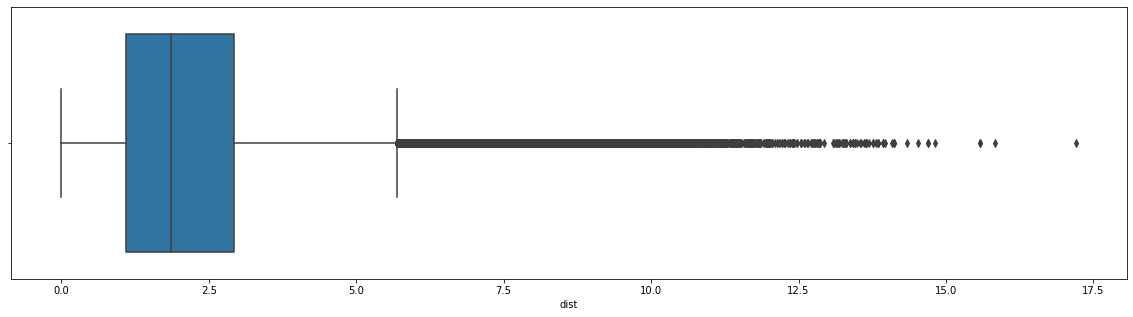

In [80]:
plt.figure(figsize = (20,5))
sns.boxplot(final.dist)
plt.show()

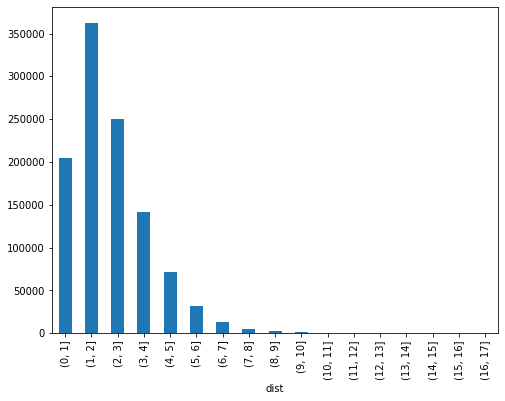

In [82]:
# plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
#          bins = int(180/5))
final.dist.groupby(pd.cut(final.dist, np.arange(0,18,1))).count().plot(kind='bar',figsize=(8,6))
#sns.distplot(final['dist'])
plt.show()

The right skewed distribution of the distance is explainable since people only prefer bicyle rides for short distances.
hence the distance ranging from 0-7 km has highest of counts.

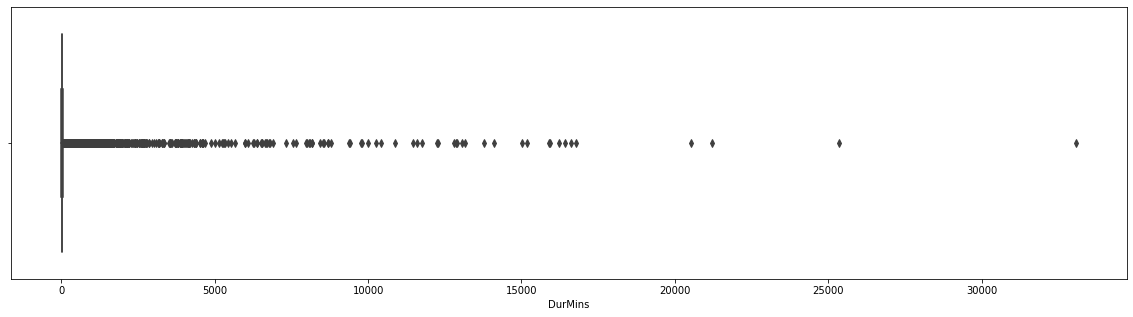

In [83]:
plt.figure(figsize = (20,5))
final['DurMins']= final['Journey Duration']/60
sns.boxplot(final['DurMins'])
plt.show()

We clearly have many outliers, lets check them. and also plot the counts on Journey Duration

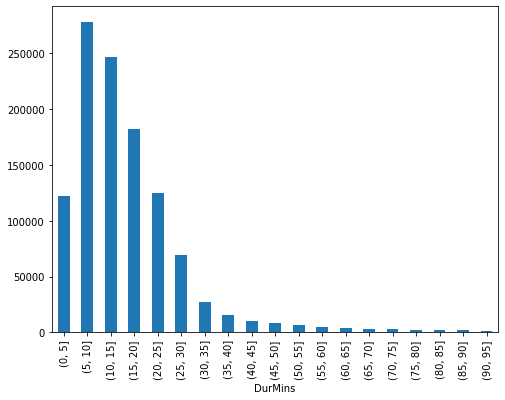

In [84]:
final.DurMins.groupby(pd.cut(final.DurMins, np.arange(0,100,5))).count().plot(kind='bar',figsize=(8,6))
plt.show()

In [87]:
final['DurMins'].max() #1984700.0 0.7353
final[final['DurMins'] > 10000].shape[0]#27
final[final['DurMins'] > 1000].shape[0] #563
final[final['DurMins'] > 120][['DurMins', 'dist']] #11301
#final.shape[0] #1129670

,DurMins,dist
215,150.650000,0.824961
232,142.000000,3.664124
233,142.000000,3.664124
397,549.000000,0.345098
648,120.266667,1.636640
681,123.550000,0.453101
703,263.883333,1.184130
996,241.000000,0.000000
997,240.000000,0.000000
1790,198.483333,4.816108


In [88]:
fordur = final[final['DurMins'] < 120].reset_index()

for our prediction purposes we remove the journeys above 120 minutes i.e 2 hours on WEEKDAYS.

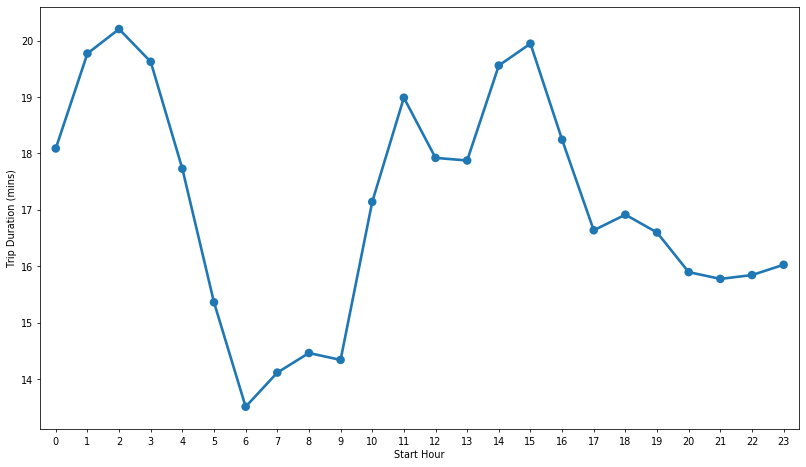

In [89]:
plt.figure(figsize=(14, 8), dpi=70)
group1 = fordur.groupby('Start Hour')['DurMins'].mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (mins)')
plt.xlabel('Start Hour')
plt.show()

In [90]:
X = fordur[['dist','Start DT']]
Y = fordur['Journey Duration']

In [ ]:
X['Start WeekNum'] = X['Start DT'].dt.weekday
X['Start Hour'] = X['Start DT'].dt.hour
 

In [ ]:
X.drop('Start DT', axis= 1, inplace = True)
X.nunique()
X.shape[0]

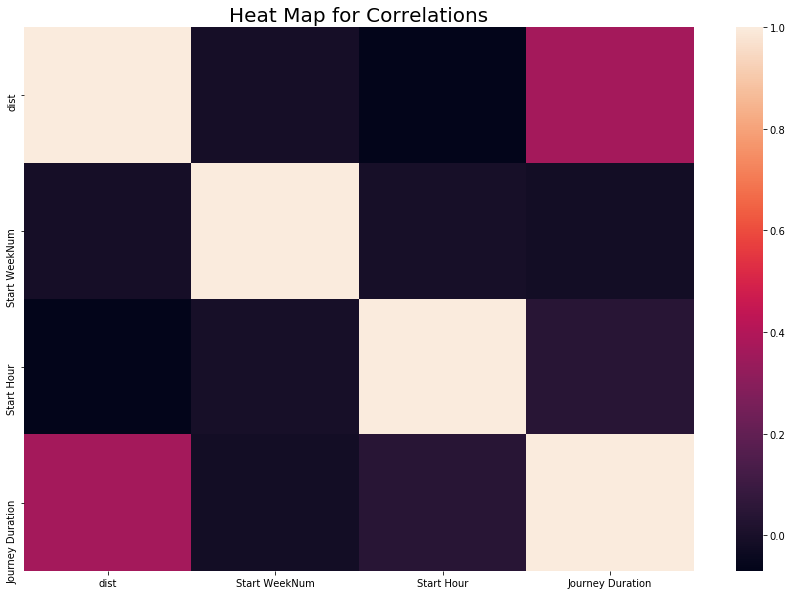

In [93]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(pd.concat([X,Y], axis = 1).corr())
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=4, test_size=0.2)

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

linear_pred = regressor.predict(X_test) 

In [98]:
print('RMSE score for the Multiple LR  is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,linear_pred))))
print('Variance score for the Multiple LR is : %.2f' % regressor.score(X_test, y_test))
print("\n")

RMSE score for the Multiple LR  is : 770.600566824546
Variance score for the Multiple LR is : 0.14




In [100]:
regressor_rfraw = RandomForestRegressor(n_jobs=-1)
# regressor_rf1 = RandomForestRegressor(n_estimators = 8,
#                                      max_depth = 10,
#                                      min_samples_split = 6,
#                                      n_jobs=-1)

regressor_rfraw.fit(X_train,y_train)
regressor_rf1.fit(X_train,y_train)
rf_pred = regressor_rfraw.predict(X_test)
rf1_pred = regressor_rf1.predict(X_test)
print("\n")

/home/hammad/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [101]:
print('RMAE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,rf_pred))))
print('Variance score for the RF regressor raw is : %.2f' % regressor_rfraw.score(X_test, y_test))
print('\n\n\n')
print('RMSE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,rf1_pred))))
print('Variance score for the RF regressor raw is : %.2f' % regressor_rf1.score(X_test, y_test))

RMAE score for the RF regressor raw is : 628.8587852844109
Variance score for the RF regressor raw is : 0.43




RMSE score for the RF regressor raw is : 689.532334531187
Variance score for the RF regressor raw is : 0.31


# Time Series Analysis

In [103]:
df.groupby(['Start DT','Start Station ID'])['Journey ID'].count().sum()

1517095

In [104]:
ts = df[['Journey ID', 'Start DT', 'Start Station ID']]
ts = ts.groupby('Start DT')['Journey ID'].count().sort_values().to_frame()
ts = ts.rename(columns = {'Journey ID': 'count'})
ts.head()

,count
Start DT,
2017-09-13 03:00:00,14
2017-09-04 03:00:00,19
2017-08-21 03:00:00,21
2017-09-12 03:00:00,24
2017-09-11 03:00:00,24


In [106]:
ts.sort_index(inplace = True)
ts.index

DatetimeIndex(['2017-08-01 00:00:00', '2017-08-01 01:00:00',
               '2017-08-01 02:00:00', '2017-08-01 03:00:00',
               '2017-08-01 04:00:00', '2017-08-01 05:00:00',
               '2017-08-01 06:00:00', '2017-08-01 07:00:00',
               '2017-08-01 08:00:00', '2017-08-01 09:00:00',
               ...
               '2017-09-19 14:00:00', '2017-09-19 15:00:00',
               '2017-09-19 16:00:00', '2017-09-19 17:00:00',
               '2017-09-19 18:00:00', '2017-09-19 19:00:00',
               '2017-09-19 20:00:00', '2017-09-19 21:00:00',
               '2017-09-19 22:00:00', '2017-09-19 23:00:00'],
              dtype='datetime64[ns]', name='Start DT', length=1200, freq=None)

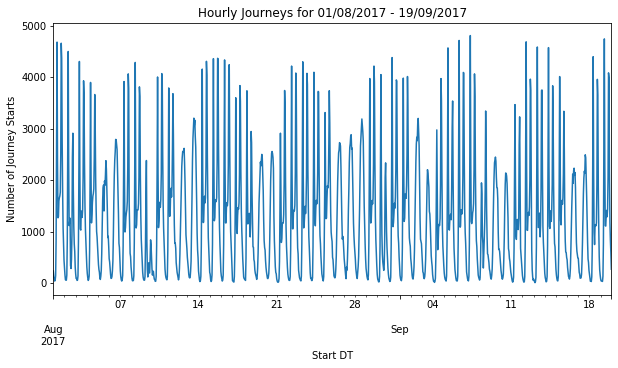

In [107]:
ts.plot(figsize=(10,5), 
          title='Hourly Journeys for 01/08/2017 - 19/09/2017', 
          legend=False)
plt.ylabel('Number of Journey Starts');

In [108]:
ts_train = ts[:'2017-08'].copy(deep = True)
ts_test = ts['2017-09'].copy(deep = True)

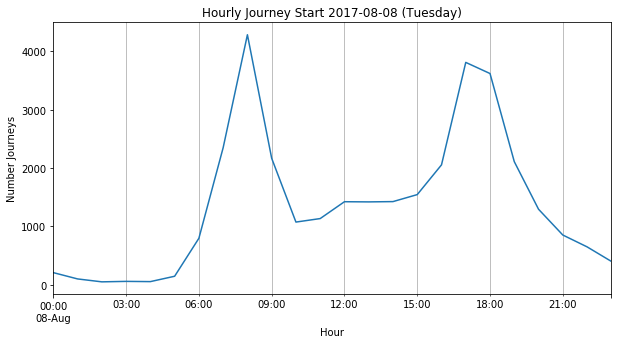

In [109]:
date_str = '2017-08-08' # a random Tuesday date
plot_title = 'Hourly Journey Start {} (Tuesday)'.format(date_str)
ts_train[date_str].plot(figsize=(10,5),
                    title=plot_title,
                    legend=False,
                    xlim=(ts_train[date_str].index.min(),
                          ts_train[date_str].index.max()))
plt.ylabel('Number Journeys')
plt.xlabel('Hour')
plt.grid(which='minor');

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace import sarimax

<Figure size 1080x720 with 0 Axes>

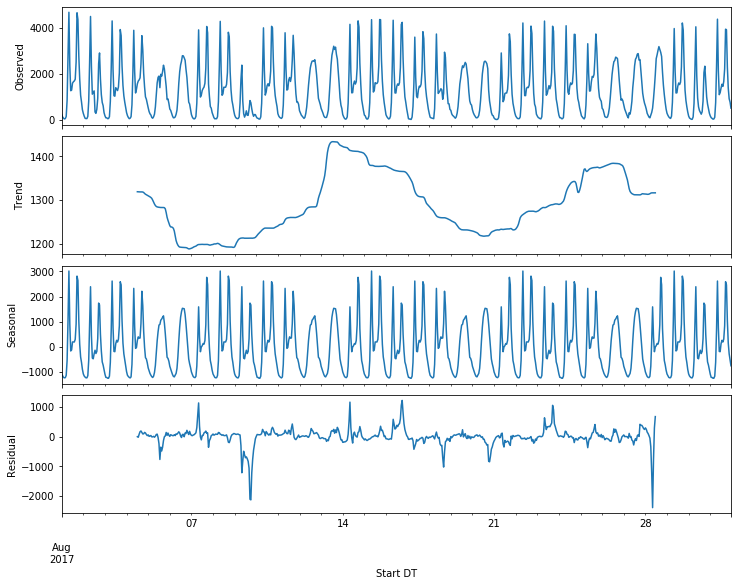

In [126]:
decomposition = seasonal_decompose(ts_train, freq=168)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10, 8)

In [115]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=24).mean()
    rolstd = timeseries.rolling(window=24).std()
    plt.figure(figsize=(10,5))
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean',lw = 1)
    std = plt.plot(rolstd, color='black', label = 'Rolling Std', lw = 1)
    plt.legend(loc='best')
    plt.xlim(timeseries.index.min(), timeseries.index.max())
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries.iloc[:,0].values)
    print('> p-value: {:.3e}'.format(result[1]))
    print('> Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

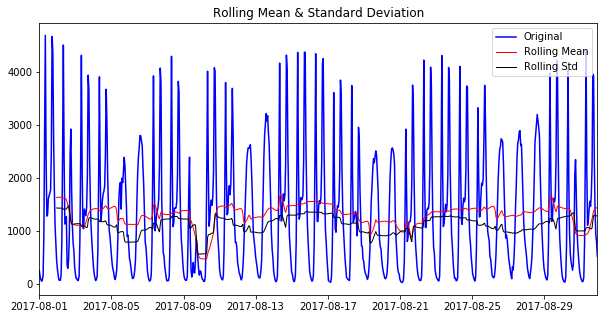

Results of Dickey-Fuller Test:
> p-value: 5.398e-12
> Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [116]:
test_stationarity(ts_train)

In [117]:
test = ts_train.drop(ts_train['2017-08-09'].index).reset_index()
test.set_index('Start DT', inplace=True)

As we know there was anamoly at august 09th August, 2019. Removing at checking stationarity.

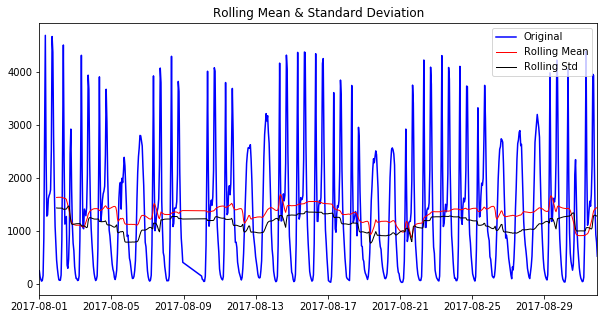

Results of Dickey-Fuller Test:
> p-value: 5.749e-19
> Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [118]:
test_stationarity(test)

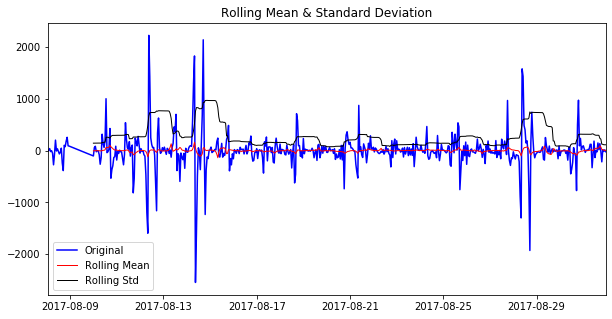

Results of Dickey-Fuller Test:
> p-value: 3.654e-18
> Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [123]:
diff = test - test.shift(1) #strongest stationarity
diff = diff-diff.shift(168) #24* 7 since we have strong seasonality at weekends
diff.dropna(inplace=True)
#diff = diff.to_frame()

test_stationarity(diff)

Number of lags: 72 (3.00 days)


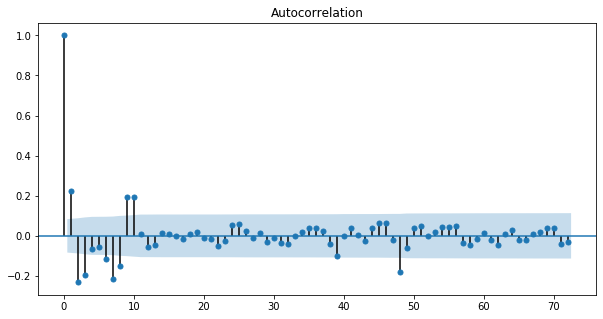

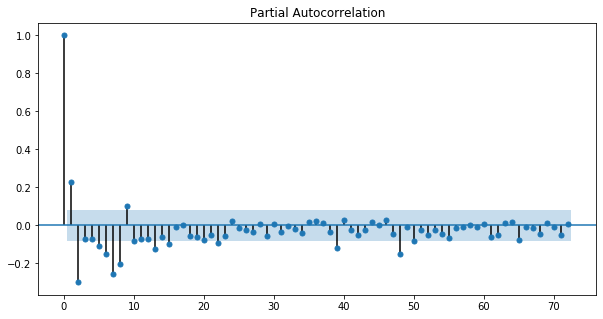

In [124]:
from statsmodels.graphics.tsaplots import plot_acf,  plot_pacf

lags_to_show = 72
print('Number of lags: {} ({:.2f} days)'.format(lags_to_show, 
                                                lags_to_show/24))

# plot autocorrelation 
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(diff, ax = ax, lags=lags_to_show);

# plot PACF
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(diff, ax = ax, lags=lags_to_show);

The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters.

p is identified to 2. since PA remains constant after it.
our series was stationary for 1. d = 1

In [ ]:
sar_m = sarimax.SARIMAX(test.values,
                        trend='n', 
                        order=(2,1,1), 
                        seasonal_order=(2, 1, 1, 24), 
                        simple_differencing=False).fit()

In [136]:
def plot_forecast(actual, pred, title, 
                  xlabel, ylabel, 
                  grid=True, figsize=(10, 5)):
    
    if len(actual) != len(pred):
        return_str = 'Unequal lengths error: '
        return_str += '({} actual, '.format(len(actual))
        return_str += '{} forecast)'.format(len(pred))
        return return_str
    
    plt.figure(figsize=figsize)
    plt.plot(actual, label='Actual')
    plt.plot(actual.index, pred, label='Predicted', c='r')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(actual.index.date[::24], 
               actual.index.day[::24])
    plt.xlim(min(actual.index.date), max(actual.index.date))
    plt.legend(loc=0)
    plt.grid(True)

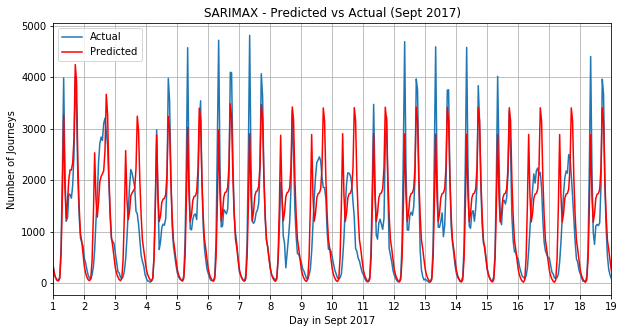

In [137]:
predict_steps = 24*19
forecast = sar_m.forecast(steps=predict_steps)

plot_forecast(ts_test[:predict_steps], forecast, 
              title='SARIMAX - Predicted vs Actual (Sept 2017)', 
              xlabel='Day in Sept 2017', 
              ylabel='Number of Journeys')

In [138]:
y_actual = ts_test[:predict_steps]['count']
y_predicted = forecast
err = math.sqrt(metrics.mean_squared_error(y_actual, forecast))
print('RMSE: {:,.2f}'.format(err))

RMSE: 595.61


CONCLUSION:

We visualized The trends on Months, Hours, Weekdays and Weekends.
We Then identified the problem of optimizing stations that have relatively heavy traffic at the peak hours in weekdays.

To encounter our problem.
1. We Visulaized the capacity of stations.
2. Then we identified and visualized stations that had higher footfall relative to their capacity, and coloured them black, these are the stations for our consideration.
3. We found the rough measure of distance (as we are only given start and end latitudes not the complete journey track also the reason for 0 distance! With more tracking we can identify exact distance.
4. Then we predicted using Regressors the possible duration for the journey (on weekdays only).
5. We forecasted counts of possible journeys using Time Series Analysis. SARIMA (since our time series had trend at 7 days)


Solution.
1. The forecasted and visualization can help in DYNAMIC PRICING OF BiCYCLES.
2. We can increase the capacity of bicycles using the forecast with better models like Facebook Prophet.

Future Work:
1. Gather more data to run better regressors and Time Series Models.
2. Identify the reason behind the business of stations with higher footfall, and use this knowlegde to weight the expansion program of Stations anually.